D:\rgzn\lib\site-packages\ipykernel_launcher.py:52: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
D:\rgzn\lib\site-packages\ipykernel_launcher.py:55: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
D:\rgzn\lib\site-packages\ipykernel_launcher.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
D:\rgzn\lib\site-packages\ipykernel_launcher.py:58: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


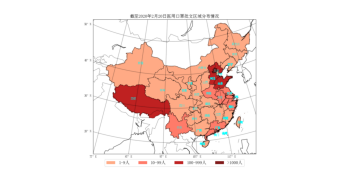

In [2]:
import numpy as np
import matplotlib
import matplotlib.figure
import matplotlib.image as mpimg
from matplotlib.font_manager import FontProperties
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif'] = ['FangSong']  # 设置默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时乱码问题

df = pd.read_excel('口罩产业.xlsx',sheet_name='Sheet4').loc[1:30,['医用口罩产业链下游企业区域分布情况（单位：家）','Unnamed: 1']]
city = []
number = []

for c in df['医用口罩产业链下游企业区域分布情况（单位：家）']:
    city.append(c)

for n in df['Unnamed: 1']:
    n = int(n)
    number.append(n)


data_pair_1 = [(i, int(j)) for i, j in zip(city, number)]

def plot_distribution_graph(province_positions):

    # 相关参数设置
    width, height, rect, lat_min, lat_max, lon_min, lon_max = 1600, 800, [0.1, 0.12, 0.8, 0.8], 0, 60, 77, 140
    # 全局经纬投影替换为如下设置
    # width, height, rect, lat_min, lat_max, lon_min, lon_max = 3000, 1500, [0, 0, 1, 1], -90, 90, 0, 360

    # 匹配图例颜色
    handles = [
        matplotlib.patches.Patch(color='#ffaa85', alpha=1, linewidth=0),
        matplotlib.patches.Patch(color='#ff7b69', alpha=1, linewidth=0),
        matplotlib.patches.Patch(color='#bf2121', alpha=1, linewidth=0),
        matplotlib.patches.Patch(color='#7f1818', alpha=1, linewidth=0),
    ]
    # 设置图例标签
    labels = ['1-9人', '10-99人', '100-999人', '>1000人']

    fig = matplotlib.figure.Figure()
    # 设置绘图板尺寸
    fig.set_size_inches(width / 100, height / 100)
    axes = fig.add_axes(rect)

    # 局部兰博托投影
    m = Basemap(projection='lcc', llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, lat_1=33, lat_2=45,
                lon_0=100, ax=axes)

    # 读取shape文件，shape文件主要的作用是：画海陆分界线、国界线、行政分界线。
    m.readshapefile('files/shapefiles/china', 'province', drawbounds=True)
    m.readshapefile('files/shapefiles/china_nine_dotted_line', 'section', drawbounds=True)
    m.drawcoastlines(color='black')  # 洲际线
    m.drawcountries(color='black')  # 国界线
    m.drawparallels(np.arange(lat_min, lat_max, 10), labels=[1, 0, 0, 0])  # 画经度线
    m.drawmeridians(np.arange(lon_min, lon_max, 10), labels=[0, 0, 0, 1])  # 画纬度线

    for p_info, p_shape in zip(m.province_info, m.province):  # 分析shape文件，得到相关省数据
        p_name = p_info['OWNER'].strip('\x00')
        f_cname = p_info['FCNAME'].strip('\x00')
        if p_name != f_cname:  # 不绘制海岛
            continue

        for key in data_pair_1:  # 设置不同数据范围区域的颜色
            if key[0] in p_name:
                if key[1] == 0:
                    color = '#f0f0f0'
                elif key[1] < 50:
                    color = '#ffaa85'
                elif key[1] < 100:
                    color = '#ff7b69'
                elif key[1] < 200:
                    color = '#bf2121'
                else:
                    color = '#7f1818'
                break

        # 添加设置的颜色至地图中
        poly = Polygon(p_shape, facecolor=color, edgecolor=color)
        axes.add_patch(poly)

        pos = province_positions[p_name]
        text = p_name.replace("自治区", "").replace("特别行政区", "").replace("壮族", "").replace("维吾尔", "") \
            .replace("回族", "").replace("省", "").replace("市", "")  # 替换省级名称

        # 指定字库并设置字体大小
        font15 = FontProperties(fname='files/fonts/simsun.ttf', size=15)
        font10 = FontProperties(fname='files/fonts/simsun.ttf', size=10)

        pset = set()
        if text not in pset:
            x, y = m(pos[0], pos[1])
            axes.text(x, y, text, fontproperties=font10, color='#00FFFF')
            pset.add(text)

    axes.legend(handles, labels, bbox_to_anchor=(0.5, -0.11), loc='lower center', ncol=4, prop=font15)
    axes.set_title("截至2020年2月20日医用口罩批文区域分布情况", fontproperties=font15)
    FigureCanvasAgg(fig)
    fig.savefig('地图.png')
    lena = mpimg.imread('地图.png')
    plt.imshow(lena)  # 显示图片
    plt.axis('off')  # 不显示坐标轴
    plt.show()


if __name__ == '__main__':
    # 各省位置
    province_positions = {
        "辽宁省": [121.7, 40.9],
        "吉林省": [124.5, 43.5],
        "黑龙江省": [125.6, 46.5],
        "北京市": [116.0, 39.9],
        "天津市": [117.0, 38.7],
        "内蒙古自治区": [110.0, 41.5],
        "宁夏回族自治区": [105.2, 37.0],
        "山西省": [111.0, 37.0],
        "河北省": [114.0, 37.8],
        "山东省": [116.5, 36.0],
        "河南省": [111.8, 33.5],
        "陕西省": [107.5, 33.5],
        "湖北省": [111.0, 30.5],
        "江苏省": [119.2, 32.5],
        "安徽省": [115.5, 31.8],
        "上海市": [121.0, 31.0],
        "湖南省": [110.3, 27.0],
        "江西省": [114.0, 27.0],
        "浙江省": [118.8, 28.5],
        "福建省": [116.2, 25.5],
        "广东省": [113.2, 23.1],
        "台湾省": [120.5, 23.5],
        "海南省": [108.0, 19.0],
        "广西壮族自治区": [107.3, 23.0],
        "重庆市": [106.5, 29.5],
        "云南省": [101.0, 24.0],
        "贵州省": [106.0, 26.5],
        "四川省": [102.0, 30.5],
        "甘肃省": [103.0, 35.0],
        "青海省": [95.0, 35.0],
        "新疆维吾尔自治区": [85.5, 42.5],
        "西藏自治区": [85.0, 31.5],
        "香港特别行政区": [115.1, 21.2],
        "澳门特别行政区": [112.5, 21.2]
    }

    plot_distribution_graph(province_positions)  # 绘制各区域确诊分布数据